In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
import keras_tuner as kt

# from keras import models
# from keras import layers

In [2]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# CNN

In [3]:
def MakeModel(class_names: list) -> tf.keras.Sequential:
    """
    Simple straight forward CNN model. this is just for simplicity and testing
    atm. I will make it more modular later once I know what we are doing

    Args:
        class_names: list of the classification names
        conv_layers: list of how many filters each convolutional layer should use
        layers: list with the sizes of each hidden layer
    
    Returns:
        `tf.keras.Sequential` - a constructed tf model
    """
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(len(class_names))) # output

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model
    

## Load Data

Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


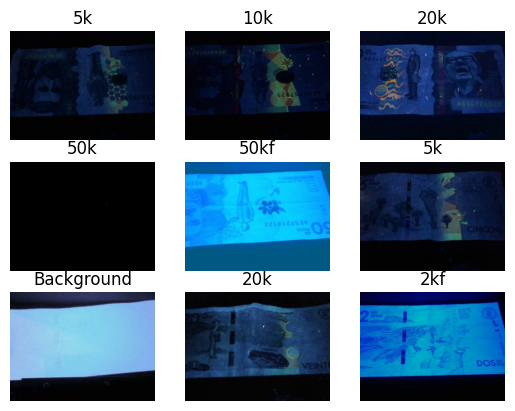

In [5]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=24)
cf.PeakData(train_ds, class_names)

# Fit

In [7]:
model = MakeModel(class_names)
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5
)

Epoch 1/5
1040/1040 [==============================] - 159s 148ms/step - loss: 0.8887 - accuracy: 0.7203 - val_loss: 0.3967 - val_accuracy: 0.8756
Epoch 2/5
1040/1040 [==============================] - 128s 123ms/step - loss: 0.1890 - accuracy: 0.9507 - val_loss: 0.1805 - val_accuracy: 0.9458
Epoch 3/5
1040/1040 [==============================] - 128s 123ms/step - loss: 0.0928 - accuracy: 0.9750 - val_loss: 0.1207 - val_accuracy: 0.9657
Epoch 4/5
1040/1040 [==============================] - 128s 123ms/step - loss: 0.0623 - accuracy: 0.9825 - val_loss: 0.0899 - val_accuracy: 0.9743
Epoch 5/5
1040/1040 [==============================] - 128s 123ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.1131 - val_accuracy: 0.9655


# Evaluate

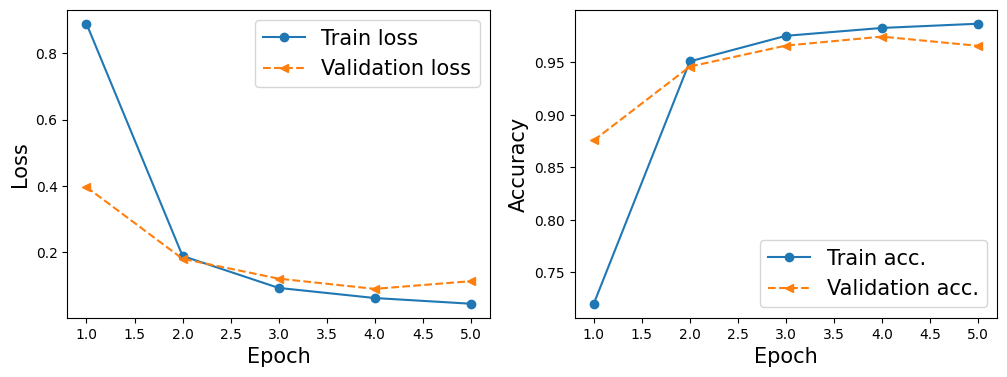

347/347 - 19s - loss: 0.1172 - accuracy: 0.9621 - 19s/epoch - 56ms/step
Test loss: 0.11715827882289886 | Test accuracy: 0.9621394276618958


(0.9865373969078064, 0.9655048251152039, 0.9621394276618958)

In [8]:
cf.EvaluateModel(model, test_ds, history)

# Results

aug, 24 batch, 16, 32, 1e-2 rate = 0.077 train, 0.0769 validation, 0.0769 test

aug, 24 batch, 32, 64, 1e-4 rate = 0.9865 train, 0.9655 validation, 0.9621 test